# 逻辑回归数据

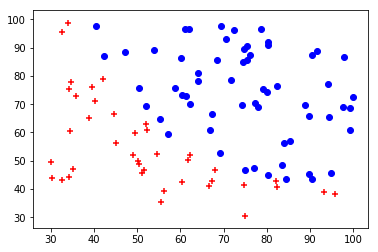

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
raw_data = np.loadtxt('ex2data1.txt', delimiter=',')
m = len(raw_data)
pos = raw_data[np.where(raw_data[:,-1]==1)]
neg = raw_data[np.where(raw_data[:,-1]==0)]
fig,ax = plt.subplots()
ax.scatter(pos[:,0], pos[:,1], c='b', marker='o')
ax.scatter(neg[:,0], neg[:,1], c='r', marker='+')
X = np.mat([np.ones(m), raw_data[:,0], raw_data[:,1]]).reshape(m,3)
y = np.mat(raw_data[:,2]).reshape(m,1)

# 代价函数及梯度
sigmoid函数我们直接使用了内置的。这里只实现代价函数。同样，关键是用矩阵形式表示：
$$J(\theta)=\frac{1}{m}[-log(h_{\theta}(X))^Ty-log(1-h_{\theta}(X))^T(1-y)]$$
$$\frac{{\partial}J(\theta)}{\partial\theta}=\frac{1}{m}X^T(h_{\theta}(X)-y)$$

In [7]:
def costFunction(theta, X, y):
    m = len(y)
    h_theta = expit(X*theta)
    J = (-np.log(h_theta.T)*y - np.log(1-h_theta.T)*(1-y)) / m
    grad = X.T * (h_theta-y) / m
    return J[0,0], grad
theta = np.zeros((3,1),)
J, grad = costFunction(theta, X, y)
J

0.69314718055994518

# 正则化逻辑回归数据

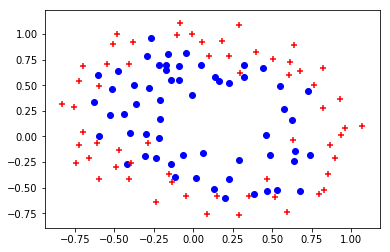

In [8]:
raw_data = np.loadtxt('ex2data2.txt', delimiter=',')
m = len(raw_data)
pos = raw_data[np.where(raw_data[:,-1]==1)]
neg = raw_data[np.where(raw_data[:,-1]==0)]
fig,ax = plt.subplots()
ax.scatter(pos[:,0], pos[:,1], c='b', marker='o')
ax.scatter(neg[:,0], neg[:,1], c='r', marker='+')
X = np.mat([np.ones(m), raw_data[:,0], raw_data[:,1]]).reshape(m,3)
y = np.mat(raw_data[:,2]).reshape(m,1)

# 正则化代价函数及梯度
假设
$$\theta^*=[0,\theta_1,...\theta_n]^T$$
则矩阵形式表示：
$$J(\theta)=\frac{1}{m}[-log(h_{\theta}(X))^Ty-log(1-h_{\theta}(X))^T(1-y)]+\frac{\lambda}{2m}\theta^{*T}\theta^*$$
$$\frac{{\partial}J(\theta)}{\partial\theta}=\frac{1}{m}X^T(h_{\theta}(X)-y)+\frac{\lambda}{m}\theta^*$$

In [11]:
def costFunctionReg(theta, X, y, lambda_):
    m = len(y)
    theta0 = theta.copy()
    theta0[0,0] = 0
    h_theta = expit(X*theta)
    J = (-np.log(h_theta.T)*y - np.log(1-h_theta.T)*(1-y)) / m + lambda_/(2*m)*theta0.T*theta0
    grad = X.T * (h_theta-y) / m + lambda_/m*theta0
    return J[0,0], grad
theta = np.zeros((3,1),)
lambda_ = 1 
J, grad = costFunctionReg(theta, X, y, lambda_)
J

0.6931471805599454